<a href="https://colab.research.google.com/github/hectorpilo/Wine-Quality-DS/blob/main/CORE_Prediccion_Calidad_VINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/BBDD/WineQT.csv"
import pandas as pd
df = pd.read_csv(path)

Mounted at /content/drive


Carga y Exploracion de Datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


funcion para ver los valores unicos de cada columna.

In [5]:
def mostrar_valores_unicos(df): #funcion para poder mostrar los valores unicos de cada columna.
    for columna in df.columns:
        print(f"\n🔹 Columna: {columna}")
        print(f"🧮 Total de valores únicos: {df[columna].nunique()}")
        print(f"📋 Valores únicos: {sorted(df[columna].unique())[:10]}{' ...' if df[columna].nunique() > 10 else ''}")


In [6]:
#mostrar_valores_unicos(df)   #no utilizaré esta funcion, ya que al ser valores continuos...posiblemente cada valor es diferente y tambíen es probable que se repitan por ser datos de ese tipo.


🔹 Columna: fixed acidity
🧮 Total de valores únicos: 91
📋 Valores únicos: [np.float64(4.6), np.float64(4.9), np.float64(5.0), np.float64(5.1), np.float64(5.2), np.float64(5.3), np.float64(5.4), np.float64(5.6), np.float64(5.7), np.float64(5.8)] ...

🔹 Columna: volatile acidity
🧮 Total de valores únicos: 135
📋 Valores únicos: [np.float64(0.12), np.float64(0.16), np.float64(0.18), np.float64(0.19), np.float64(0.2), np.float64(0.21), np.float64(0.22), np.float64(0.23), np.float64(0.24), np.float64(0.25)] ...

🔹 Columna: citric acid
🧮 Total de valores únicos: 77
📋 Valores únicos: [np.float64(0.0), np.float64(0.01), np.float64(0.02), np.float64(0.03), np.float64(0.04), np.float64(0.05), np.float64(0.06), np.float64(0.07), np.float64(0.08), np.float64(0.09)] ...

🔹 Columna: residual sugar
🧮 Total de valores únicos: 80
📋 Valores únicos: [np.float64(0.9), np.float64(1.2), np.float64(1.3), np.float64(1.4), np.float64(1.5), np.float64(1.6), np.float64(1.65), np.float64(1.7), np.float64(1.75), np

funcion para ver los valores minimos y maximos de cada columna.

In [7]:
def min_max_columnas_float(df):
    columnas_float = df.select_dtypes(include=['float64']).columns

    for col in columnas_float:
        minimo = df[col].min()
        maximo = df[col].max()
        print(f"\n🔹 Columna: {col}")
        print(f"   🔻 Mínimo: {minimo}")
        print(f"   🔺 Máximo: {maximo}")

In [8]:
min_max_columnas_float(df)


🔹 Columna: fixed acidity
   🔻 Mínimo: 4.6
   🔺 Máximo: 15.9

🔹 Columna: volatile acidity
   🔻 Mínimo: 0.12
   🔺 Máximo: 1.58

🔹 Columna: citric acid
   🔻 Mínimo: 0.0
   🔺 Máximo: 1.0

🔹 Columna: residual sugar
   🔻 Mínimo: 0.9
   🔺 Máximo: 15.5

🔹 Columna: chlorides
   🔻 Mínimo: 0.012
   🔺 Máximo: 0.611

🔹 Columna: free sulfur dioxide
   🔻 Mínimo: 1.0
   🔺 Máximo: 68.0

🔹 Columna: total sulfur dioxide
   🔻 Mínimo: 6.0
   🔺 Máximo: 289.0

🔹 Columna: density
   🔻 Mínimo: 0.99007
   🔺 Máximo: 1.00369

🔹 Columna: pH
   🔻 Mínimo: 2.74
   🔺 Máximo: 4.01

🔹 Columna: sulphates
   🔻 Mínimo: 0.33
   🔺 Máximo: 2.0

🔹 Columna: alcohol
   🔻 Mínimo: 8.4
   🔺 Máximo: 14.9


Analizando los datos y al considerar que se habla de variables químicas (como acidez, azúcares, dióxido de azufre, etc.), debere analizar a detalle, por qué hay "0".

In [9]:
def revisar_valores_cero(df): #funcion para revisar los valores 0 en las columnas.
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        ceros = (df[col] == 0).sum()
        if ceros > 0:
            print(f"⚠️ Columna '{col}' tiene {ceros} valores cero")


In [10]:
revisar_valores_cero(df)

⚠️ Columna 'citric acid' tiene 99 valores cero
⚠️ Columna 'Id' tiene 1 valores cero


Antes de tomar cualquier deiscion respecto a la imputacion de los valores 0 de la acidez del vino, graficaré y revisare.

<Axes: xlabel='citric acid'>

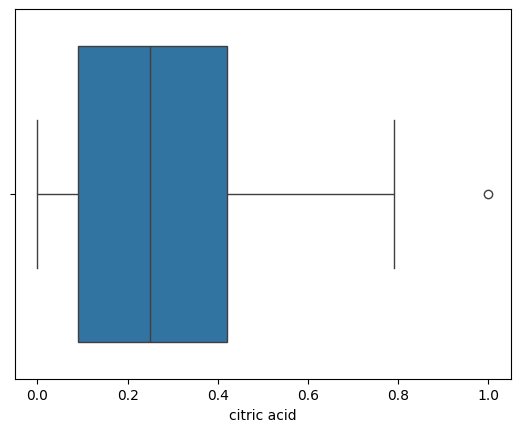

In [12]:
import seaborn as sns
sns.boxplot(x='citric acid', data=df)

revisaré cuantos valores iguales a 1 hay.

In [13]:
df[df['citric acid'] == 1.0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
103,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4,151


este outlier, se quedará..debido a que es coherente la información que entrega el resto de las columnas respecto a la calidad del vino.

In [14]:
df_citric_cero = df[df['citric acid'] == 0] #nuevo df, donde solo muestro los valores iguales a 0.

In [15]:
print(f"🔢 Registros con citric acid = 0: {len(df_citric_cero)}") #muestro la cantidad de 0.
df_citric_cero.head()

🔢 Registros con citric acid = 0: 99


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
4,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
7,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7


En la imputación de datos, **no siempre es recomendable eliminar los valores iguales a "0"**. En este caso, considerando que se trata de mediciones relacionadas con la calidad del vino, es posible encontrar valores de este tipo cuando otras variables, como la "fixed acidity", se encuentran en rangos entre 7.3 y 7.8; la "volatile acidity", entre 0.65 y 0.88; y el "residual sugar", entre 1.2 y 2.6. Esto sugiere que dichos ceros podrían tener sentido dentro del contexto del proceso de elaboración.

Por ello, haré una funcion que filtre los 0 que no cumplen con alguno de los 3 criterios ya mencionados.

In [23]:
#Filtrare los que NO cumplen al menos uno de los tres rangos definidos
df_incoherentes = df_citric_cero[
    (df_citric_cero['fixed acidity'] < 7.3) | (df_citric_cero['fixed acidity'] > 7.8) |
    (df_citric_cero['volatile acidity'] < 0.65) | (df_citric_cero['volatile acidity'] > 0.88) |
    (df_citric_cero['residual sugar'] < 1.2) | (df_citric_cero['residual sugar'] > 2.6)
]

# Paso 3: Mostrar resumen y primeras filas
print(f"🔍 Registros con citric acid = 0 que NO cumplen los rangos definidos: {len(df_incoherentes)}")
df_incoherentes.head()

🔍 Registros con citric acid = 0 que NO cumplen los rangos definidos: 84


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
10,5.6,0.615,0.0,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,5,12
20,7.1,0.710,0.0,1.9,0.080,14.0,35.0,0.9972,3.47,0.55,9.4,5,28
21,7.8,0.645,0.0,2.0,0.082,8.0,16.0,0.9964,3.38,0.59,9.8,6,29
25,7.8,0.645,0.0,5.5,0.086,5.0,18.0,0.9986,3.40,0.55,9.6,6,35
52,6.8,0.785,0.0,2.4,0.104,14.0,30.0,0.9966,3.52,0.55,10.7,6,77


Del total de valores de 0, en la columna "citric acid", apliqué un filtro para seleccionar los valores que no cumplan el rango mencionado. Sin embargo, son 84 valores, lo cual es bastante alto (a mi criterio).

Realizaré un analisis de manera grafica, para ver la correlación que hay entre "citric acid" y "fixed acidity","volatile acidity" y "residual sugar".

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


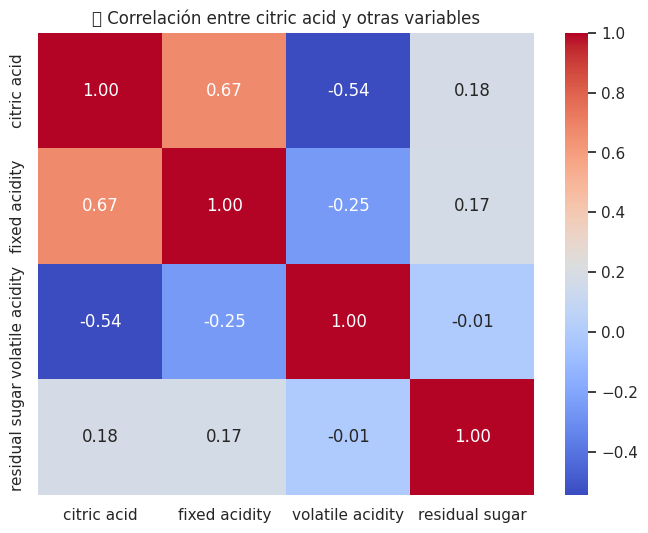

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las variables relevantes
cols = ['citric acid', 'fixed acidity', 'volatile acidity', 'residual sugar']
corr_matrix = df[cols].corr()

# Dibujamos el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('📊 Correlación entre citric acid y otras variables')
plt.show()

Del Mapa de calor se puede resumir que:
* Citric Acid, tiene una correlación positiva y fuerte (+0.67) con "fixed acidity"
* Existe una correlación negativa moderada entre citric acid y volatile acidity (r = –0.54), lo que indica que, en general, a medida que aumenta la acidez volátil en el vino, disminuye la cantidad de ácido cítrico presente.


 Graficos de dispercion

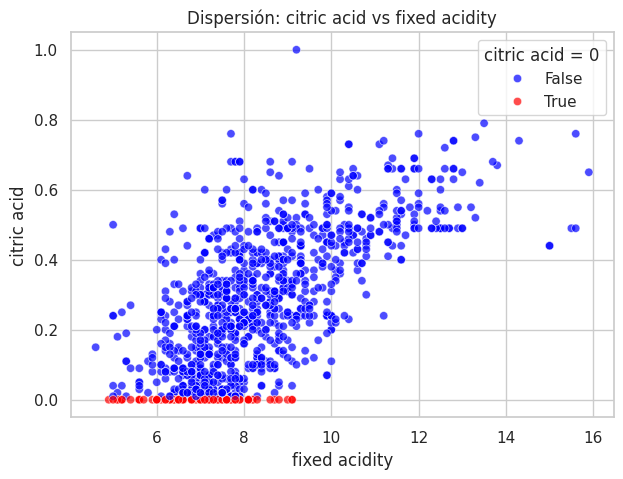

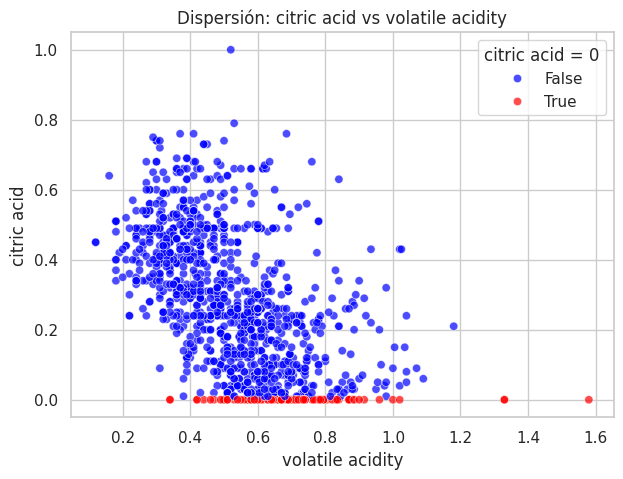

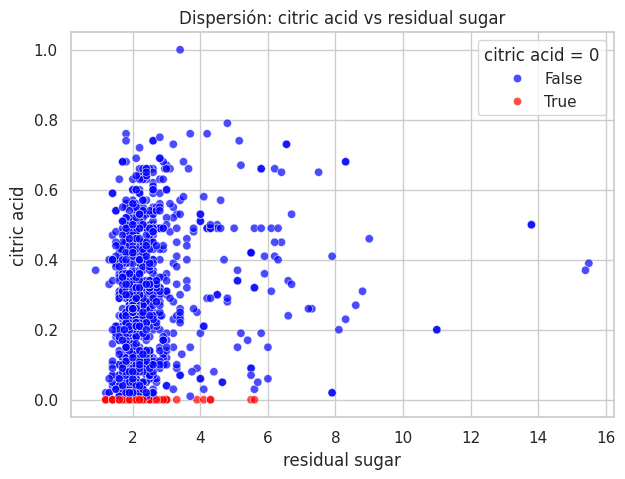

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna booleana para identificar si citric acid es 0
df['citric_zero'] = df['citric acid'] == 0

# Configurar estilo
sns.set(style='whitegrid')

# Lista de pares a graficar
variables = ['fixed acidity', 'volatile acidity', 'residual sugar']

# Crear los 3 gráficos
for var in variables:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df, x=var, y='citric acid', hue='citric_zero', palette={True: 'red', False: 'blue'}, alpha=0.7)
    plt.title(f"Dispersión: citric acid vs {var}")
    plt.xlabel(var)
    plt.ylabel("citric acid")
    plt.legend(title='citric acid = 0')
    plt.show()

# **Conclusión respecto al Análisis Exploratorio de Datos (EDA)**

* Durante el análisis exploratorio del dataset, se identificaron 99 registros con valores iguales a cero en la variable "citric acid". Si bien enología y química permiten ciertos escenarios donde el ácido cítrico podría estar ausente (por ejemplo, en vinos secos o de bajo perfil de acidez fija), un análisis cruzado con otras variables clave (fixed acidity, volatile acidity, residual sugar) reveló que 84 de esos casos no cumplían rangos esperables ni coherentes con un perfil enológico realista.

Por otro lado, se observó:

* Una correlación positiva moderada entre citric acid y fixed acidity (r = +0.67).
* Una correlación negativa con volatile acidity (r = –0.54), sugiriendo una compensación entre tipos de acidez.
* Una relación muy débil con residual sugar (r ≈ +0.18).

En base a estos hallazgos, y para asegurar la integridad del dataset, **decidí eliminar los 84 registros incoherentes,** manteniendo solo aquellos casos con citric acid = 0 que presentan un perfil químico coherente.

In [26]:
# Creare una copia limpia del DataFrame original, sin los registros incoherentes
df_limpio = df.drop(df_incoherentes.index)

In [27]:
print(f"✅ Filas originales: {df.shape[0]}")
print(f"🧹 Filas después de limpiar: {df_limpio.shape[0]}")

✅ Filas originales: 1143
🧹 Filas después de limpiar: 1059


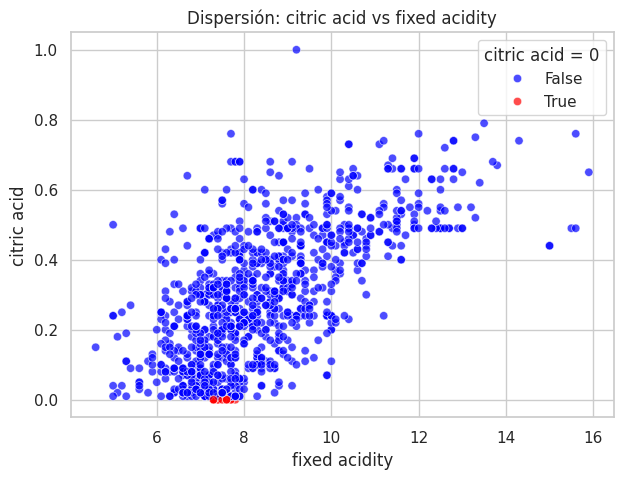

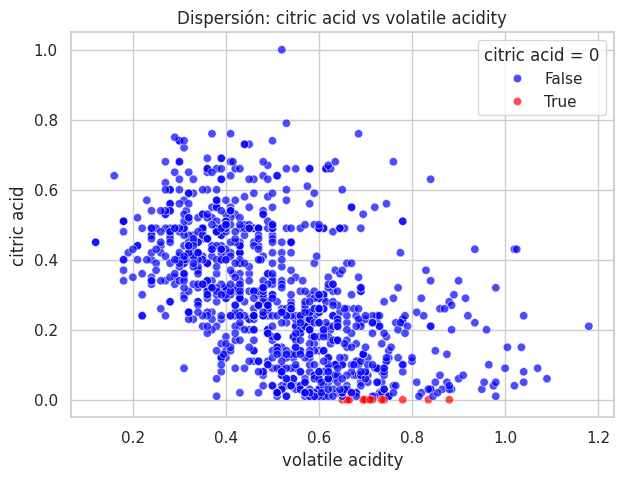

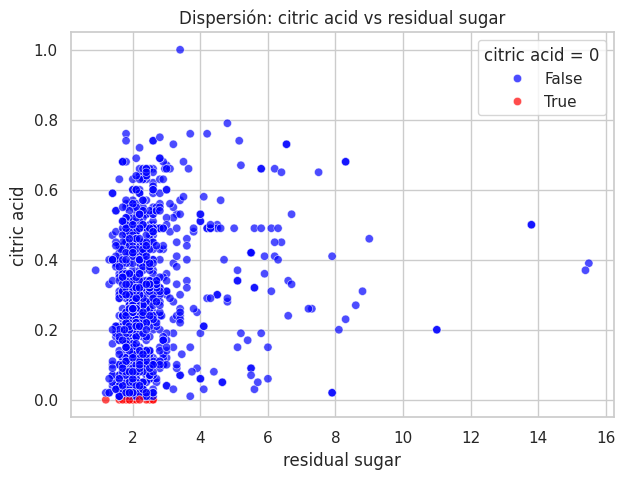

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna booleana para identificar si citric acid es 0
df_limpio['citric_zero'] = df_limpio['citric acid'] == 0

# Configurar estilo
sns.set(style='whitegrid')

# Lista de pares a graficar
variables = ['fixed acidity', 'volatile acidity', 'residual sugar']

# Crear los 3 gráficos
for var in variables:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df_limpio, x=var, y='citric acid', hue='citric_zero', palette={True: 'red', False: 'blue'}, alpha=0.7)
    plt.title(f"Dispersión: citric acid vs {var}")
    plt.xlabel(var)
    plt.ylabel("citric acid")
    plt.legend(title='citric acid = 0')
    plt.show()

# **Pre-Procesamiento de los datos**

In [29]:
df_limpio.columns #columnas disponibles.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'citric_zero'],
      dtype='object')

In [30]:
X = df_limpio.drop(columns=['quality', 'Id'])  # dropeo de columnas que no utilizaré como feature.
y = df_limpio['quality']

In [31]:
from sklearn.model_selection import train_test_split #division del conjunto entrenamiento y prueba.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Entrenamiento con modelos de Clasificacion.**

**1) KNN Classifier**

✅ Mejor valor de k: 27 con accuracy promedio: 0.5951


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


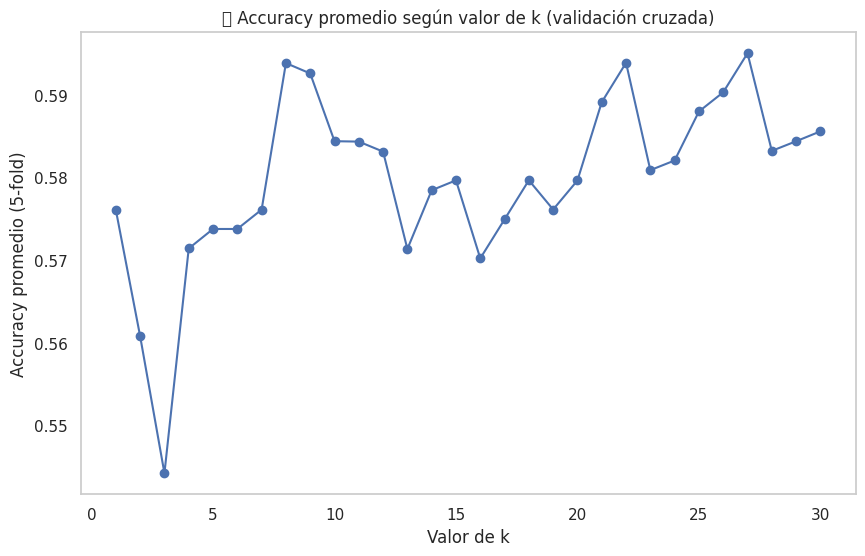

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    scores.append(score.mean())

# Calculo de K optimo.
mejor_k = k_range[scores.index(max(scores))]
print(f"✅ Mejor valor de k: {mejor_k} con accuracy promedio: {max(scores):.4f}")

# Graficar la curva
plt.figure(figsize=(10,6))
plt.plot(k_range, scores, marker='o')
plt.title("🔎 Accuracy promedio según valor de k (validación cruzada)")
plt.xlabel("Valor de k")
plt.ylabel("Accuracy promedio (5-fold)")
plt.grid()
plt.show()


In [38]:
# KNN con K = 27
knn = KNeighborsClassifier(n_neighbors=27)
#EntrenO del modelo con los datos escalados
knn.fit(X_train_scaled, y_train)
# predicciones
y_pred = knn.predict(X_test_scaled)

🔎 Accuracy: 0.5330188679245284

📋 Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.60      0.70      0.65        92
           6       0.48      0.52      0.50        82
           7       0.38      0.26      0.31        23
           8       0.00      0.00      0.00         4

    accuracy                           0.53       212
   macro avg       0.29      0.30      0.29       212
weighted avg       0.49      0.53      0.51       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

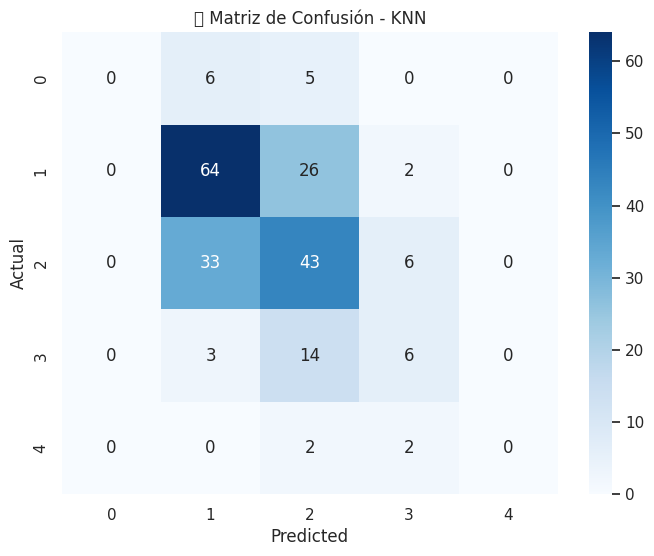

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Exactitud
print("🔎 Accuracy:", accuracy_score(y_test, y_pred))

# Reporte por clase
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Matriz de Confusión - KNN")
plt.show()

**Conclusion KNN**
* De las prediucciones, el modelo de KNN con un K=27, logro una prediccion aceptable en las calidades de 5 y 6.

**2) RandomForest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
rf = RandomForestClassifier(random_state=42)

# Entrenar con datos escalados
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred_rf = rf.predict(X_test_scaled)

🔍 Accuracy: 0.6084905660377359

📋 Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.73      0.68        92
           6       0.60      0.60      0.60        82
           7       0.46      0.52      0.49        23
           8       1.00      0.25      0.40         4

    accuracy                           0.61       212
   macro avg       0.54      0.42      0.43       212
weighted avg       0.58      0.61      0.59       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

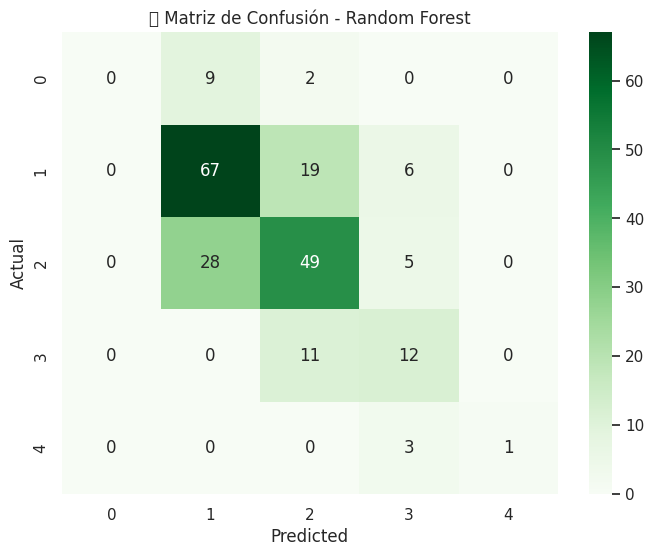

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("🔍 Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Matriz de Confusión - Random Forest")
plt.show()

**Conclusion RandomForest Classifier**
* De las prediucciones, el modelo de KNN con un K=27, logro una prediccion aceptable en las calidades de 5 y 6. Con 73 y 60% de acierto respectivamente.

**2.1) Ajuste HiperParamtros para RandomForest Classifier**

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
rf = RandomForestClassifier(random_state=42)

In [46]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

In [47]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=2   # muestra progreso
)

In [48]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [49]:
print("✅ Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

print("\n🎯 Mejor score promedio de validación:")
print(grid_search.best_score_)

✅ Mejor combinación de hiperparámetros:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

🎯 Mejor score promedio de validación:
0.6623320570831883


In [50]:
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.66      0.72      0.69        92
           6       0.58      0.60      0.59        82
           7       0.44      0.52      0.48        23
           8       1.00      0.25      0.40         4

    accuracy                           0.60       212
   macro avg       0.54      0.42      0.43       212
weighted avg       0.58      0.60      0.59       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


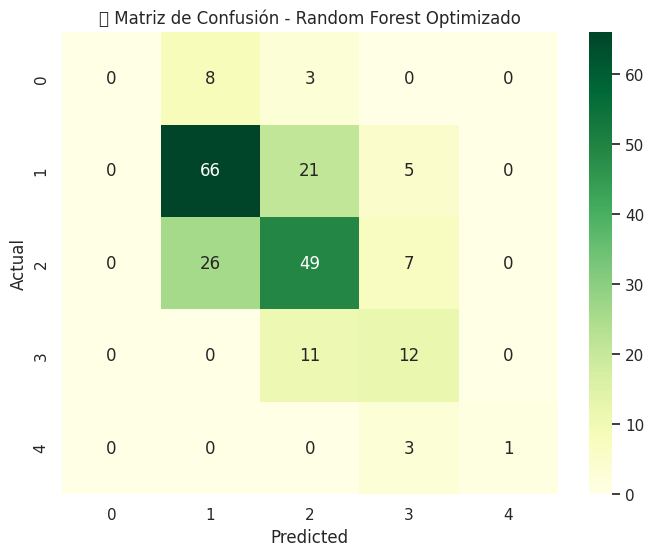

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='YlGn')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Matriz de Confusión - Random Forest Optimizado")
plt.show()

**3) Regresion Logistica**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Modelo base con parámetros por defecto
log_base = LogisticRegression(random_state=42, max_iter=1000)
log_base.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log_base = log_base.predict(X_test_scaled)

# Evaluación
print("📊 Accuracy modelo base:", accuracy_score(y_test, y_pred_log_base))
print("\n📋 Reporte clasificación:\n", classification_report(y_test, y_pred_log_base))

📊 Accuracy modelo base: 0.5283018867924528

📋 Reporte clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.59      0.73      0.65        92
           6       0.48      0.49      0.48        82
           7       0.36      0.22      0.27        23
           8       0.00      0.00      0.00         4

    accuracy                           0.53       212
   macro avg       0.29      0.29      0.28       212
weighted avg       0.48      0.53      0.50       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


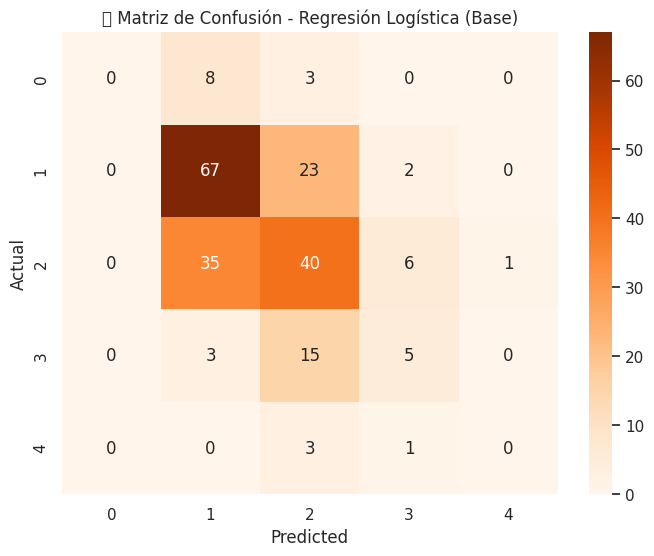

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_base), annot=True, fmt='d', cmap='Oranges')
plt.title("📊 Matriz de Confusión - Regresión Logística (Base)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
# Definir la malla de parámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # regularización inversa
    'penalty': ['l2'],        # usamos L2 para clasificación multiclase
    'solver': ['lbfgs', 'saga']  # solvers compatibles con multiclase
}

# GridSearchCV
grid_log = GridSearchCV(LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
                        param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar con los datos
grid_log.fit(X_train_scaled, y_train)

# Ver los mejores parámetros
print("✅ Mejor combinación de hiperparámetros:")
print(grid_log.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Mejor combinación de hiperparámetros:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [57]:
best_log = grid_log.best_estimator_
y_pred_log_opt = best_log.predict(X_test_scaled)

# Reporte y accuracy
print("📊 Accuracy modelo optimizado:", accuracy_score(y_test, y_pred_log_opt))
print("\n📋 Reporte clasificación:\n", classification_report(y_test, y_pred_log_opt))

📊 Accuracy modelo optimizado: 0.5283018867924528

📋 Reporte clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.59      0.73      0.65        92
           6       0.48      0.49      0.48        82
           7       0.36      0.22      0.27        23
           8       0.00      0.00      0.00         4

    accuracy                           0.53       212
   macro avg       0.29      0.29      0.28       212
weighted avg       0.48      0.53      0.50       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


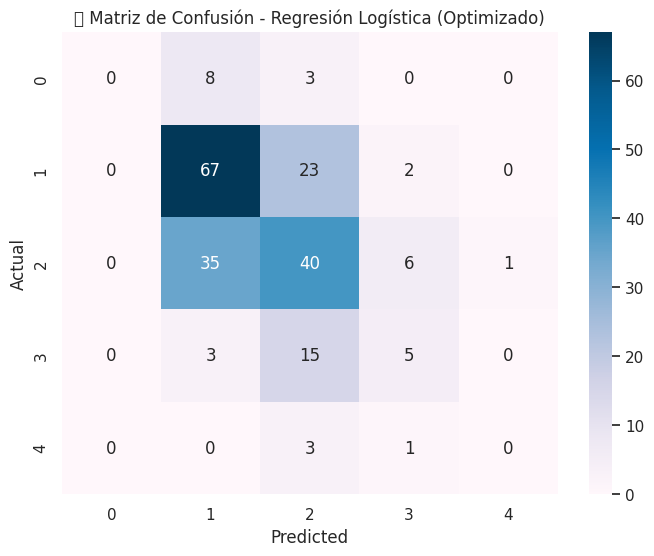

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_opt), annot=True, fmt='d', cmap='PuBu')
plt.title("📊 Matriz de Confusión - Regresión Logística (Optimizado)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Evaluacion del modelos**

* Como criterio hice la conversion de valores de calidad a binario, bueno o malo. donde los vinos buenos son de calidad mayores a 7.

Random Forest

In [63]:
y_bin = (y >= 7).astype(int)  # Vinos buenos: calidad mayor a o igual a 7.

In [60]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Escalar nuevamente si es necesario
scaler = StandardScaler()
X_train_bin_scaled = scaler.fit_transform(X_train_bin)
X_test_bin_scaled = scaler.transform(X_test_bin)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_bin = RandomForestClassifier(random_state=42)
rf_bin.fit(X_train_bin_scaled, y_train_bin)

# Probabilidades para ROC
y_proba_rf = rf_bin.predict_proba(X_test_bin_scaled)[:, 1]  # Solo clase positiva (1)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


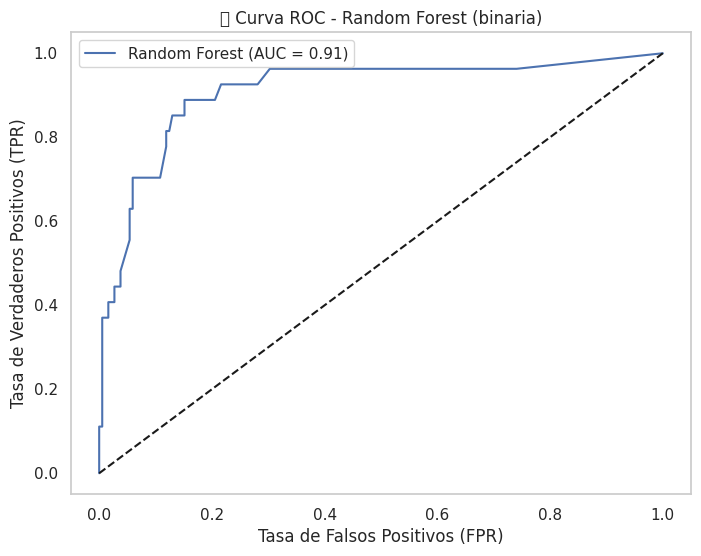

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba_rf)
auc = roc_auc_score(y_test_bin, y_proba_rf)

# Graficar curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("📊 Curva ROC - Random Forest (binaria)")
plt.legend()
plt.grid()
plt.show()

KNN y Regresion Logistica

In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_bin = LogisticRegression(max_iter=1000)
log_bin.fit(X_train_bin_scaled, y_train_bin)
y_proba_log = log_bin.predict_proba(X_test_bin_scaled)[:, 1]

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_bin = KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train_bin_scaled, y_train_bin)
y_proba_knn = knn_bin.predict_proba(X_test_bin_scaled)[:, 1]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


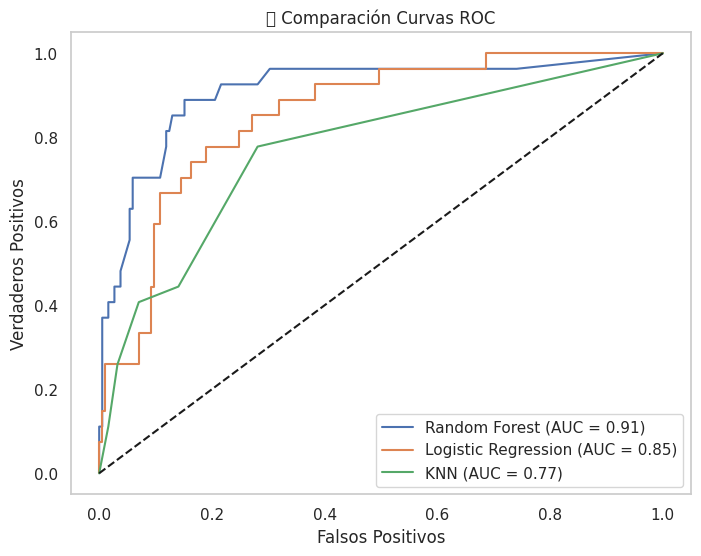

In [65]:
plt.figure(figsize=(8,6))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_proba_rf)
auc_rf = roc_auc_score(y_test_bin, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test_bin, y_proba_log)
auc_log = roc_auc_score(y_test_bin, y_proba_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, y_proba_knn)
auc_knn = roc_auc_score(y_test_bin, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("📊 Comparación Curvas ROC")
plt.legend()
plt.grid()
plt.show()

**Conclusión del Cientifico.**


* Luego de un proceso completo de validación cruzada y ajuste de hiperparámetros, el modelo Random Forest fue el que mostró el mejor desempeño general, tanto en métricas individuales como en el análisis de AUC-ROC. Se recomienda utilizar este modelo para predecir la calidad del vino en producción